In [3]:
## added libraries
import pandas as pd 
import numpy as np

In [4]:
##Import data into Python environment.
data=pd.read_csv('Comcast_telecom_complaints_data.csv')

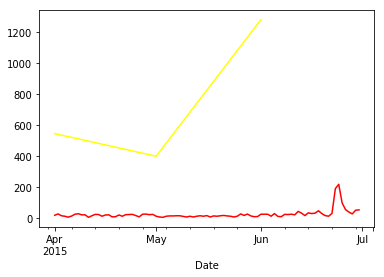

In [11]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
import matplotlib.pyplot as plt
data['Date']=pd.to_datetime(data['Date'])
data['MonthYear']=pd.to_datetime(data['Date']).dt.to_period('M')
#ax2.set_title('No of Complaints VS Date Line Graph')
series1=data.sort_values(by=['MonthYear']).groupby(data['MonthYear']).count()['Customer Complaint']
series2=data.sort_values(by=['Date']).groupby(data['Date']).count()['Customer Complaint']
series1.plot(color='yellow');
series2.plot(color='red');

In [6]:
#Provide a table with the frequency of complaint types.
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
data['Received Via'].value_counts().head(1)

Customer Care Call    1119
Name: Received Via, dtype: int64

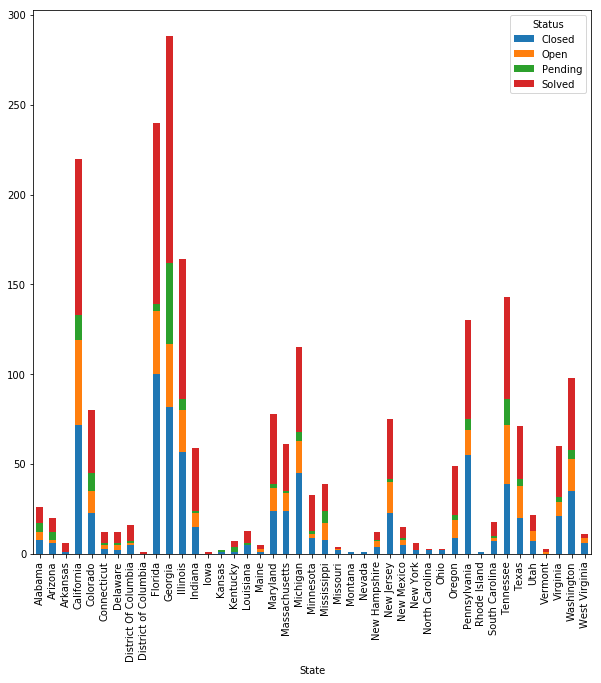

In [7]:
## Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
##    Which state has the maximum complaints
##    Which state has the highest percentage of unresolved complaints
stacked=data.groupby(by=['State','Status']).count()['Customer Complaint']
stacked.unstack().plot(kind="bar", stacked=True,figsize=(10,10));

In [8]:
##Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [10]:
def openClose(x):
    if (x=='Open' or x=='Pending'):
        return 'Open'
    return 'Closed'

data["OpenClosed"] = data['Status'].apply(openClose)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,MonthYear,OpenClosed
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05,Closed


In [157]:
## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
(data[ ((data['Received Via']== 'Customer Care Call') | (data['Received Via']== 'Internet')) & ((data['Status']== 'Closed') | (data['Status'] == 'Solved'))].count()['MonthYear']/data.count()['MonthYear'])*100

76.75359712230215